In [ ]:
x # pip install accelerate

In [ ]:
# from accelerate import DataLoaderConfiguration

# dataloader_config = DataLoaderConfiguration(
#     dispatch_batches=None,
#     split_batches=False,
#     even_batches=True,
#     use_seedable_sampler=True
# )

# from accelerate import Accelerator

# accelerator = Accelerator(dataloader_config=dataloader_config)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# folder_path = '/content/drive/MyDrive/UEH/ICT/final/'

# %cd {folder_path}

In [ ]:
# pip install -q transformers gradio accelerate -U

In [ ]:
# https://drive.google.com/file/d/17Um12qRGVwCbDA-TLcUDAkymYssNsN2T/view?usp=sharing
!gdown 17Um12qRGVwCbDA-TLcUDAkymYssNsN2T

In [ ]:
# pip install torch torchvision torchaudio

In [ ]:
# !pip install transformers --upgrade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
import gradio as gr

In [ ]:
import ast
data = pd.read_csv('content/FinalRatingsOver.csv')
# data['review'] = data['review'].apply(ast.literal_eval)
# data['review'] = data.review.apply(lambda x: list(set(x)))

data.head(5)

,review,label
0,outlet great better dish servic yum garlic amb...,1
1,summer pay qualiti tax get realli time visit s...,0
2,varieti toastizza differ theyv burger mark the...,1
3,blue recommend cool sizzl qualiti could dazzl ...,1
4,dri realli stale month small meet unfortun pla...,1


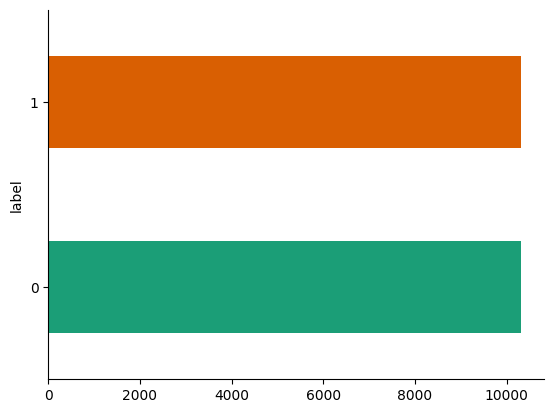

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.label.value_counts()

1    10301
0    10301
Name: label, dtype: int64

In [ ]:
# # @title rating

# from matplotlib import pyplot as plt
# data['rating'].plot(kind='hist', bins=20, title='rating')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# def drop_duplicate_reviews(data, min_length=0, min_count=2):
#     review_counts_df = data['review'].value_counts().reset_index()
#     review_counts_df.columns = ['review', 'count']
#     mask = (review_counts_df['review'].str.len() >= min_length) & (review_counts_df['count'] >= min_count)
#     rating_df = data[~data['review'].isin(review_counts_df[mask]['review'])].reset_index(drop=True)
#     return rating_df

# def drop_duplicate_advanced(df):
#     positive_df = df[df['sentiment'] == 'positive']
#     negative_df = df[df['sentiment'] == 'negative']

#     positive_df_dedup = drop_duplicate_reviews(positive_df)
#     negative_df_dedup = drop_duplicate_reviews(negative_df)

#     result_df = pd.concat([positive_df_dedup, negative_df_adedup], ignore_index=True)
#     return result_df


In [ ]:
# data = drop_duplicate_advanced(data)
# data = data.sample(frac=1).reset_index(drop=True)

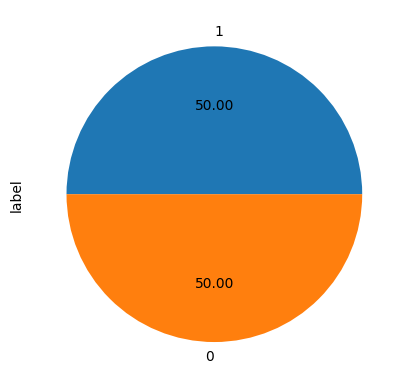

In [ ]:
data.label.value_counts().plot.pie(autopct='%.2f');

In [ ]:
# data['review'] = data['review'].apply(lambda x: ' '.join(x))

In [ ]:
# data.label.value_counts()

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# X = data['review'].values
# y = data['label'].values

# rus = RandomUnderSampler(sampling_strategy=1)
# X = X.reshape(-1, 1)

# X_res, y_res = rus.fit_resample(X, y)

# X_res_flat = X_res.flatten()
# X_res_series = pd.Series(X_res_flat)

# y_res_series = pd.Series(y_res)

# ax = y_res_series.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("under-sampling")

In [ ]:
data.label.value_counts()

1    10301
0    10301
Name: label, dtype: int64

In [ ]:
# drop_duplicate_reviews(data[data.sentiment == 'positive'])

# drop_duplicate_reviews(data[data.sentiment == 'negative'])

In [ ]:
X = data['review']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Dataset class
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, label):
        self.encodings = encodings
        self.label = label

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.label[idx])
        return item

    def __len__(self):
        return len(self.label)

In [ ]:
# Tokenize the data
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

# Create datasets
train_dataset = ReviewDataset(train_encodings, y_train.tolist())
test_dataset = ReviewDataset(test_encodings, y_test.tolist())

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
  8%|▊         | 500/6183 [04:29<50:50,  1.86it/s] 

{'loss': 0.4699, 'grad_norm': 9.731101036071777, 'learning_rate': 5e-05, 'epoch': 0.24}


 16%|█▌        | 1000/6183 [08:55<45:25,  1.90it/s] 

{'loss': 0.3717, 'grad_norm': 135.19667053222656, 'learning_rate': 4.560091500967799e-05, 'epoch': 0.49}


 24%|██▍       | 1500/6183 [13:28<41:10,  1.90it/s]  

{'loss': 0.3706, 'grad_norm': 11.911844253540039, 'learning_rate': 4.1201830019355975e-05, 'epoch': 0.73}


 32%|███▏      | 2000/6183 [19:10<36:47,  1.90it/s]   

{'loss': 0.3514, 'grad_norm': 0.7295443415641785, 'learning_rate': 3.680274502903396e-05, 'epoch': 0.97}


 40%|████      | 2500/6183 [24:15<32:27,  1.89it/s]   

{'loss': 0.3044, 'grad_norm': 4.965734958648682, 'learning_rate': 3.240366003871195e-05, 'epoch': 1.21}


 49%|████▊     | 3000/6183 [29:00<27:50,  1.91it/s]  

{'loss': 0.2817, 'grad_norm': 3.990945339202881, 'learning_rate': 2.8004575048389936e-05, 'epoch': 1.46}


 57%|█████▋    | 3500/6183 [35:10<23:33,  1.90it/s]   

{'loss': 0.2581, 'grad_norm': 1.3270373344421387, 'learning_rate': 2.3605490058067922e-05, 'epoch': 1.7}


 65%|██████▍   | 4000/6183 [46:15<19:14,  1.89it/s]   

{'loss': 0.25, 'grad_norm': 0.5152269005775452, 'learning_rate': 1.920640506774591e-05, 'epoch': 1.94}


 73%|███████▎  | 4500/6183 [54:17<14:55,  1.88it/s]   

{'loss': 0.2063, 'grad_norm': 4.347509384155273, 'learning_rate': 1.4807320077423898e-05, 'epoch': 2.18}


 81%|████████  | 5000/6183 [1:04:20<11:26,  1.72it/s]   

{'loss': 0.1825, 'grad_norm': 0.4390197694301605, 'learning_rate': 1.0408235087101884e-05, 'epoch': 2.43}


 89%|████████▉ | 5500/6183 [1:09:17<06:00,  1.90it/s]  

{'loss': 0.1887, 'grad_norm': 0.17478111386299133, 'learning_rate': 6.009150096779869e-06, 'epoch': 2.67}


 97%|█████████▋| 6000/6183 [1:13:52<01:35,  1.91it/s]

{'loss': 0.1739, 'grad_norm': 14.766963005065918, 'learning_rate': 1.610065106457857e-06, 'epoch': 2.91}


100%|██████████| 6183/6183 [1:15:32<00:00,  1.36it/s]

{'train_runtime': 4532.0876, 'train_samples_per_second': 10.91, 'train_steps_per_second': 1.364, 'train_loss': 0.28135308381829777, 'epoch': 3.0}


TrainOutput(global_step=6183, training_loss=0.28135308381829777, metrics={'train_runtime': 4532.0876, 'train_samples_per_second': 10.91, 'train_steps_per_second': 1.364, 'train_loss': 0.28135308381829777, 'epoch': 3.0})

In [ ]:
def evaluate(model, tokenizer, X, y, device, batch_size=32):
    model.to(device)
    model.eval()

    accuracies, precisions, recalls, f1s = [], [], [], []

    for i in range(0, len(X), batch_size):
        batch_X = X[i:i + batch_size]
        batch_y = y[i:i + batch_size]

        inputs = tokenizer(batch_X.tolist(), padding=True, truncation=True, return_tensors="pt").to(device)
        labels = torch.tensor(batch_y.tolist()).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=-1)
            precision, recall, f1, _ = precision_recall_fscore_support(labels.cpu(), predictions.cpu(), average='binary')
            accuracy = accuracy_score(labels.cpu(), predictions.cpu())

            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

    # Calculate average metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1s) / len(f1s)

    return avg_accuracy, avg_precision, avg_recall, avg_f1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
acc, precision, recall, f1 = evaluate(model, tokenizer, X_test, y_test, device, batch_size=32)

In [ ]:
print(f"Accuracy: \t {acc:.2f}")
print(f"Precision: \t {precision:.2f}")
print(f"Recall: \t {recall:.2f}")
print(f"F1 Score: \t {f1:.2f}")

Accuracy: 	 0.94
Precision: 	 0.93
Recall: 	 0.96
F1 Score: 	 0.94


In [ ]:
# def predict_sentiment(text):
#     model.to(device)
#     inputs = tokenizer(text, return_tensors="pt").to(device)

#     with torch.no_grad():
#         outputs = model(**inputs)
#         prediction = torch.argmax(outputs.logits, dim=-1)

#     return 'Negative Review' if prediction.item() == 0 else 'Positive Review'

# iface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="text")
# iface.launch()

In [ ]:
model.save_pretrained("./trained_model")